## Predict Stress Level By Sleeping Hours

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Lindaaa0/Dataset/master/SaYoPillow.csv")
data

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [3]:
data.columns = ['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement',
                'blood_oxygen', 'eye_movement', 'sleeping_hours', 'heart_rate', 'stress_level']

## Exploratory Data Analysis (EDA)

In [4]:
data.isnull().sum()

snoring_rate        0
respiration_rate    0
body_temperature    0
limb_movement       0
blood_oxygen        0
eye_movement        0
sleeping_hours      0
heart_rate          0
stress_level        0
dtype: int64

There are no missing value on each variables or instances

In [5]:
data.describe()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


## Data Visualization

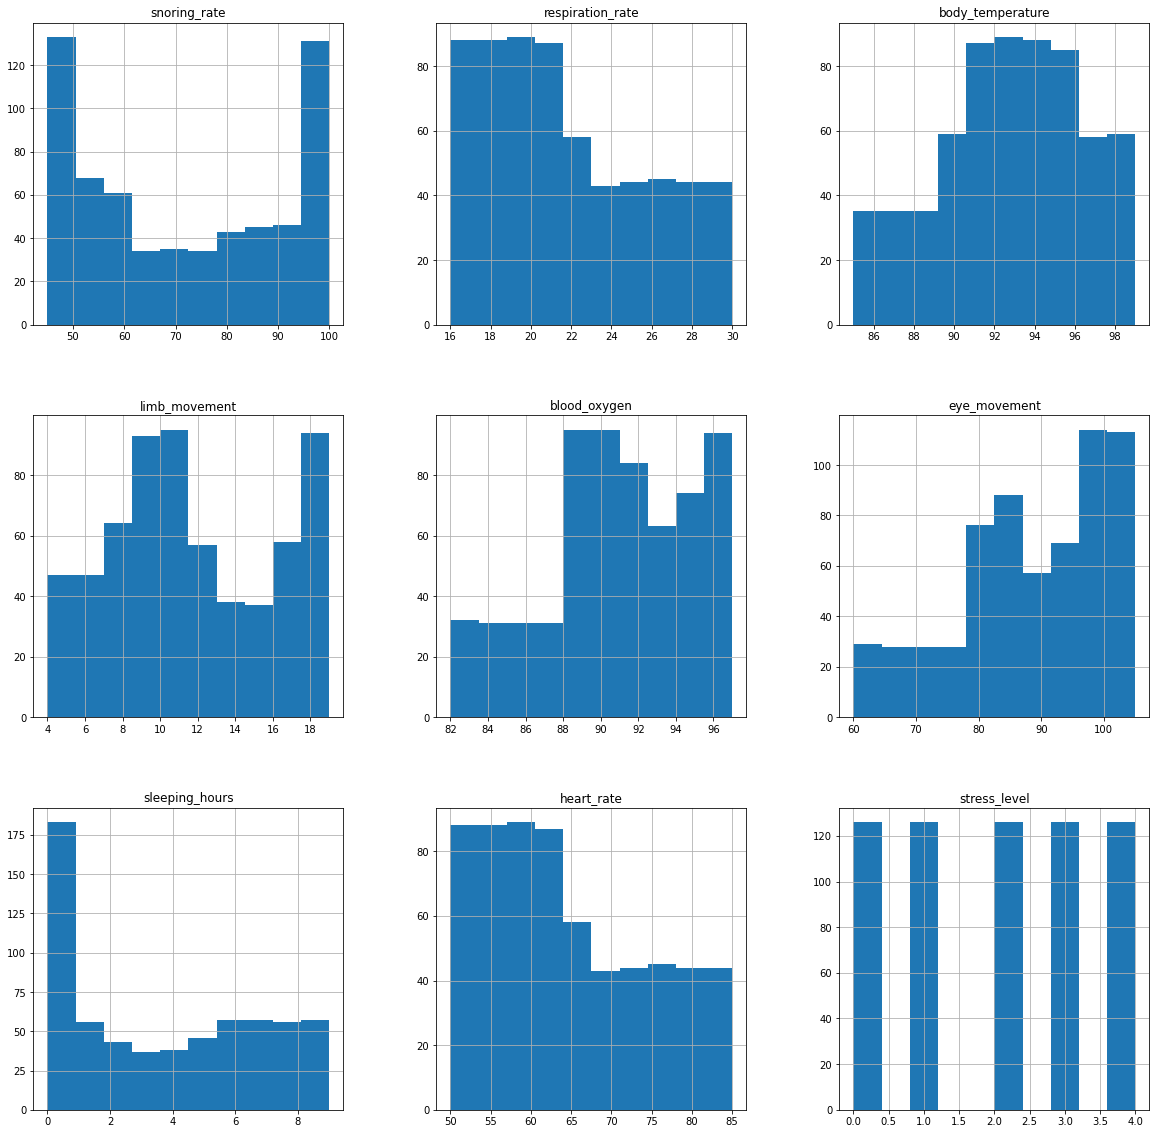

In [6]:
dist = data.hist(figsize = (20, 20))

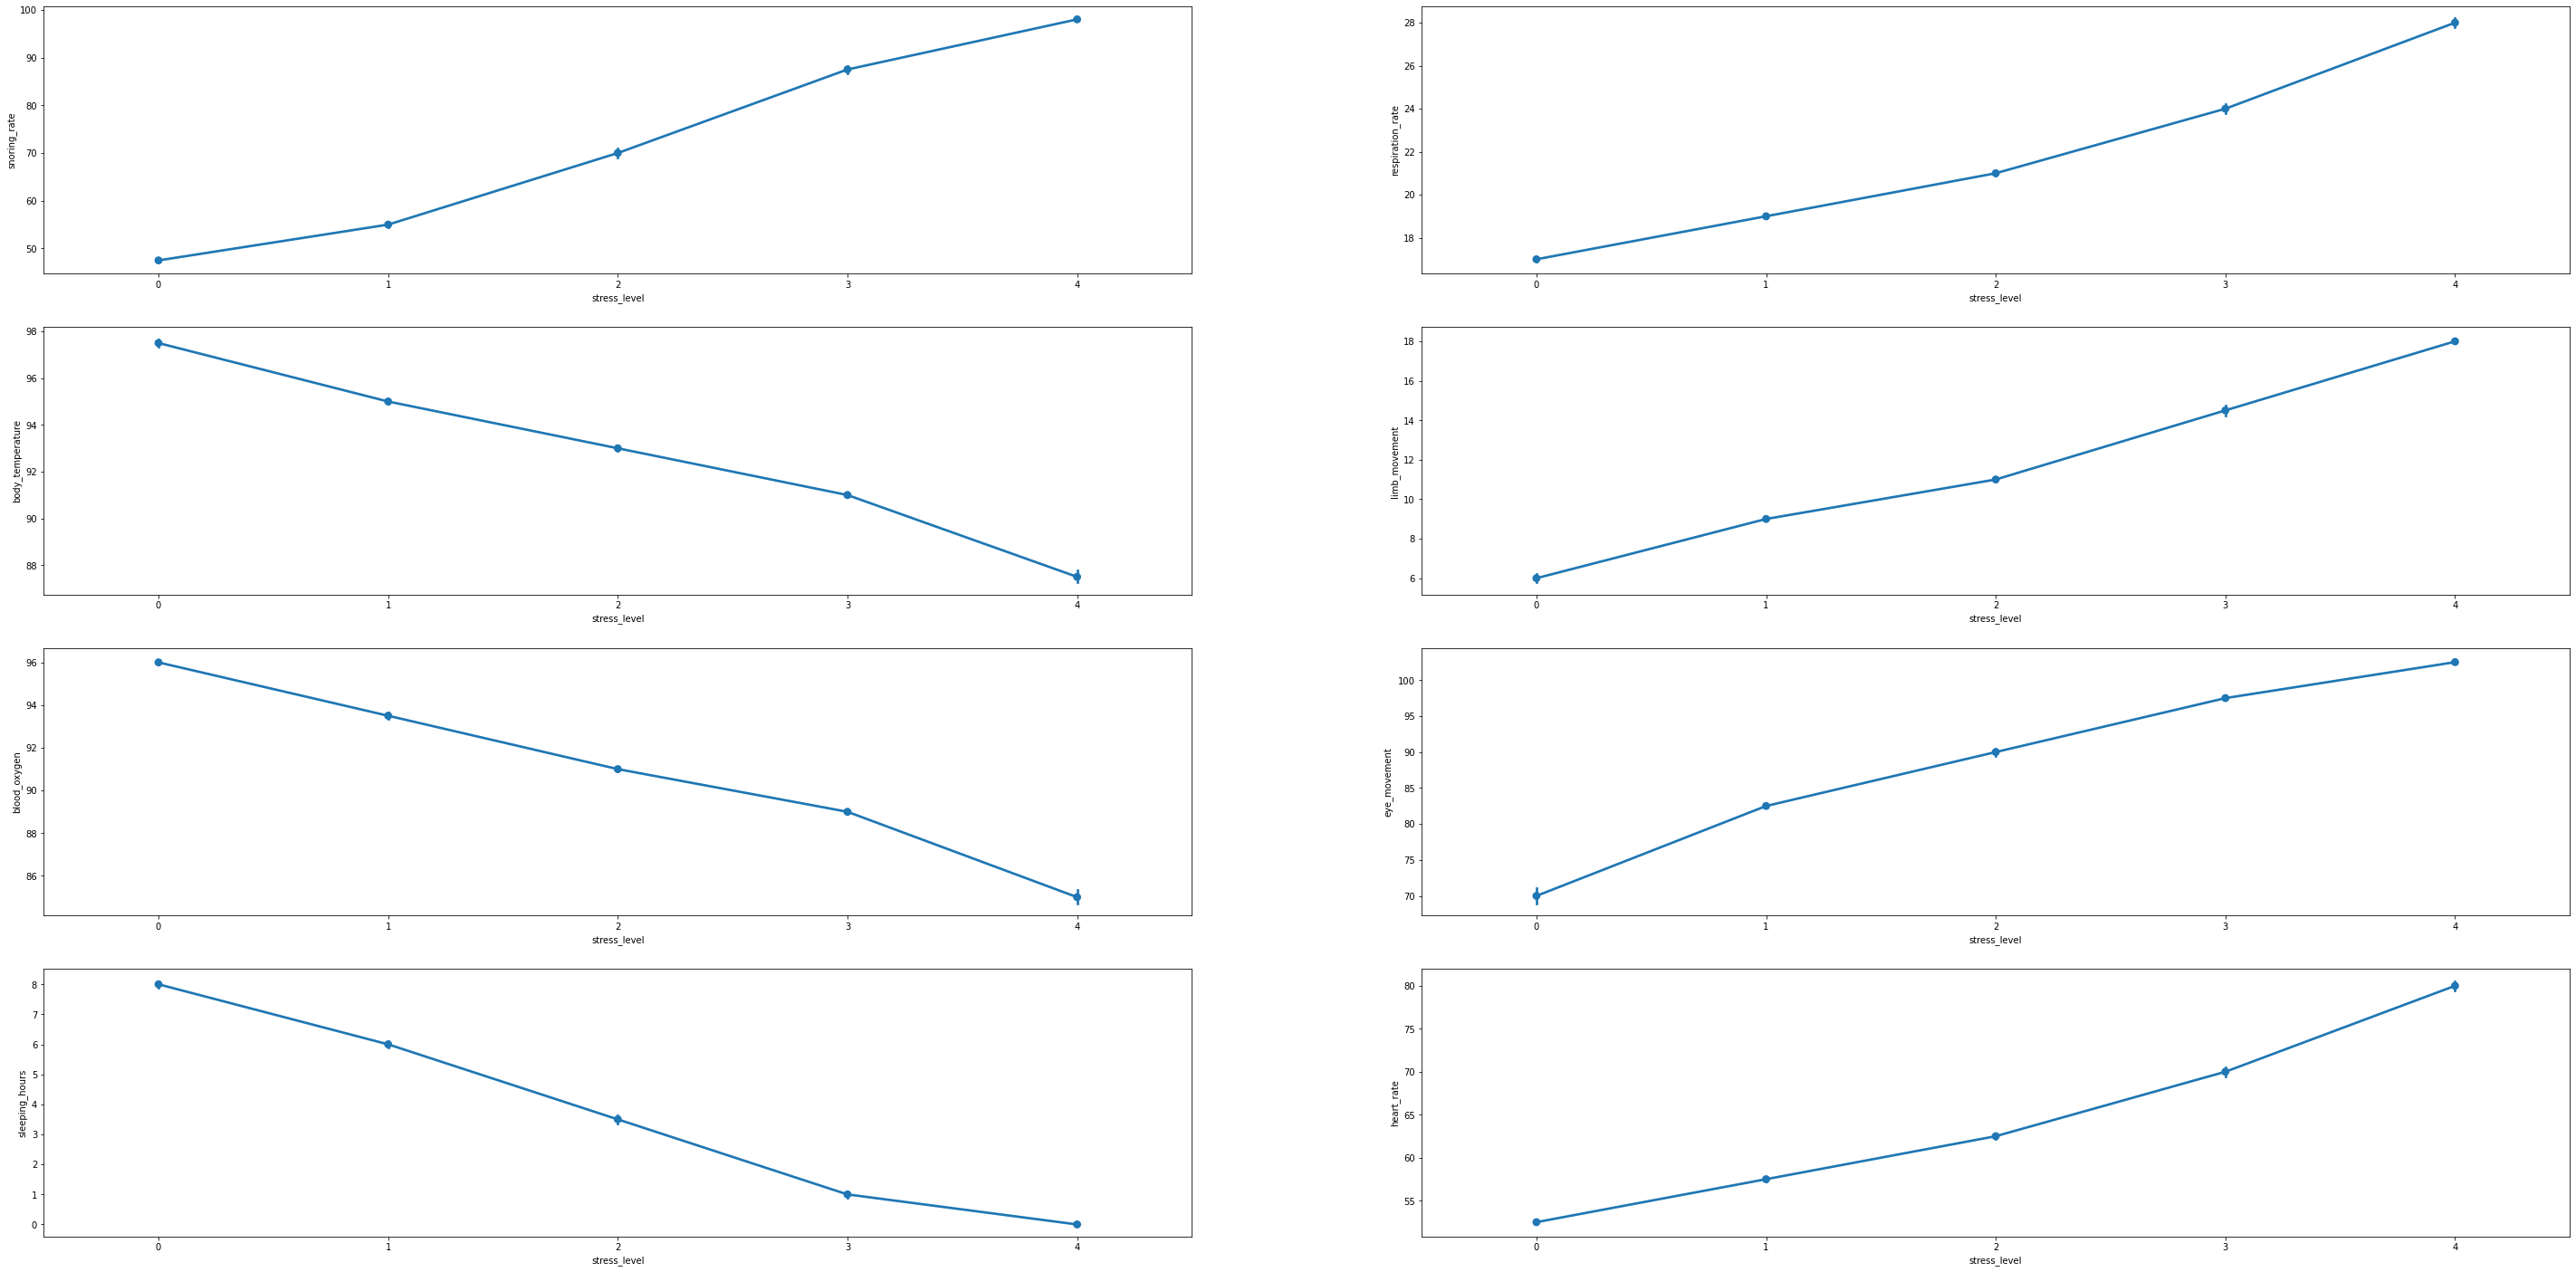

In [7]:
fig = plt.figure(figsize=(50, 25))
rows = 4
columns = 2
for i in range(len(data.columns[:-1])):
  fig.add_subplot(rows, columns, (i+1))
  img = sns.pointplot(x='stress_level',y=data.columns[i],data=data)
plt.show()

## Variable Correlation

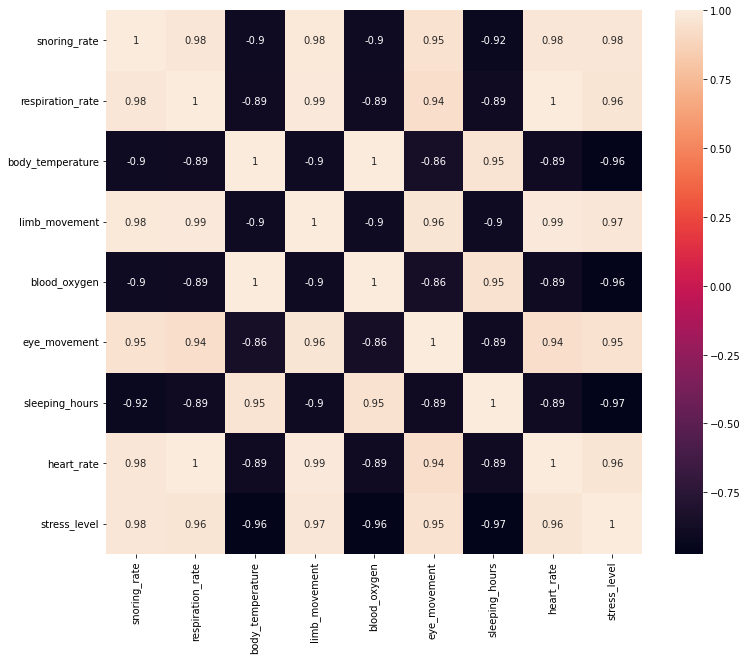

In [8]:
plt.figure(figsize = (12, 10))
p = sns.heatmap(data.corr(), annot = True)

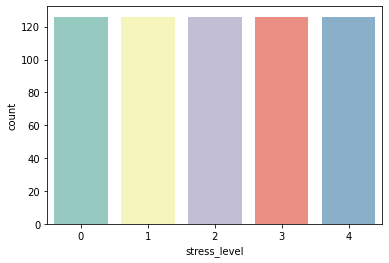

In [9]:
sns.countplot(x="stress_level", data = data, palette = "Set3")
plt.show()

## Scaling Data

In [10]:
#dropping dependent variable
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(data.drop(["stress_level"],axis = 1),), columns=['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement',
                'blood_oxygen', 'eye_movement', 'sleeping_hours', 'heart_rate'])
X.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate
0,1.146845,0.979066,-0.272195,1.140539,-0.271838,0.934005,-0.609407,0.979066
1,1.035260,0.833720,-0.353853,0.972949,-0.345696,0.873421,-0.703767,0.833720
2,-0.599252,-0.454206,0.907316,-0.395697,1.051448,-0.294506,1.081206,-0.454206
3,0.731501,0.438056,-0.576145,0.516734,-0.546753,0.708498,-0.960635,0.438056
4,-1.212970,-1.148636,1.438095,-1.211299,1.371498,-1.347997,1.490099,-1.148636


In [11]:
#assigning target variable
y = data.stress_level
y

0      3
1      3
2      1
3      3
4      0
      ..
625    2
626    0
627    4
628    1
629    2
Name: stress_level, Length: 630, dtype: int64

## Model Building

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Using 5 types of supervised machine learning algorithms to build predictive model

The step of preprocessing towards the data preparation are:
- Renaming variables : Changing all variables name to more self-explanatory for conveniency
- Drop variables : After done researching paper it is concluded all variables dependent on the target variable hence it is decided not to drop any variables
- Outliers : There're no outliers detected in the data hence the next step can be processed
- Scaling : Using standard scaler with the consideration of the range of the dataset and classifier used
- Model : splitting data to training and testing set. Using the test size of 20%

## 1. Decision Tree

In [26]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
predict = dt.predict(X_test)
print("Confusion Matrix")
print("=================")
print(confusion_matrix(y_test, predict), "\n")

predictt = dt.predict(X_train)
print("Classification Report Train")
print("=======================")
print(classification_report(y_train, predictt))

print("Classification Report Test")
print("=======================")
print(classification_report(y_test, predict))

Confusion Matrix
[[23  0  0  0  0]
 [ 1 22  1  0  0]
 [ 0  0 28  0  0]
 [ 0  0  1 25  0]
 [ 0  0  0  0 25]] 

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       102
           2       1.00      1.00      1.00        98
           3       1.00      1.00      1.00       100
           4       1.00      1.00      1.00       101

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504

Classification Report Test
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.92      0.96        24
           2       0.93      1.00      0.97        28
           3       1.00      0.96      0.98        26
           4       1.00      1.00      1.00        25

    accuracy        

>1, train: 0.407, test: 0.365
>2, train: 0.607, test: 0.563
>3, train: 0.806, test: 0.754
>4, train: 1.000, test: 0.984
>5, train: 1.000, test: 0.976
>6, train: 1.000, test: 0.984
>7, train: 1.000, test: 0.976
>8, train: 1.000, test: 0.984
>9, train: 1.000, test: 0.976
>10, train: 1.000, test: 0.984
>11, train: 1.000, test: 0.984
>12, train: 1.000, test: 0.984
>13, train: 1.000, test: 0.976
>14, train: 1.000, test: 0.976
>15, train: 1.000, test: 0.976
>16, train: 1.000, test: 0.976
>17, train: 1.000, test: 0.984
>18, train: 1.000, test: 0.984
>19, train: 1.000, test: 0.984
>20, train: 1.000, test: 0.976


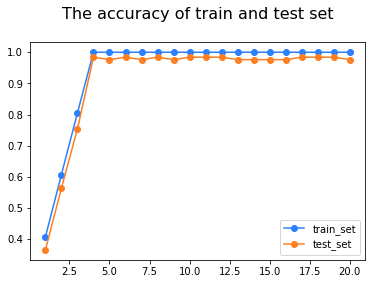

In [14]:
train_scores, test_scores = list(), list()

values = [i for i in range (1, 21)]
for i in values:
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

    # plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='train_set', color = '#2B80FF')
plt.plot(values, test_scores, '-o', label='test_set', color = '#ff7e20')
plt.legend()
plt.title("The accuracy of train and test set\n", fontsize = 16)
plt.show()

## 2. SVM

In [28]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

svc_pred = svc_model.predict(X_test)


svc_predd = svc_model.predict(X_train)
print("Classification Report Train")
print("=======================")
print(classification_report(y_train, svc_predd))


print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       102
           2       1.00      1.00      1.00        98
           3       1.00      1.00      1.00       100
           4       1.00      1.00      1.00       101

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504

[[23  0  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg

>1, train: 1.000, test: 1.000
>2, train: 1.000, test: 1.000
>3, train: 1.000, test: 1.000
>4, train: 1.000, test: 1.000
>5, train: 1.000, test: 1.000
>6, train: 1.000, test: 1.000
>7, train: 1.000, test: 1.000
>8, train: 1.000, test: 1.000
>9, train: 1.000, test: 1.000
>10, train: 1.000, test: 1.000
>11, train: 1.000, test: 1.000
>12, train: 1.000, test: 1.000
>13, train: 1.000, test: 1.000
>14, train: 1.000, test: 1.000
>15, train: 1.000, test: 1.000
>16, train: 1.000, test: 1.000
>17, train: 1.000, test: 1.000
>18, train: 1.000, test: 1.000
>19, train: 1.000, test: 1.000
>20, train: 1.000, test: 1.000


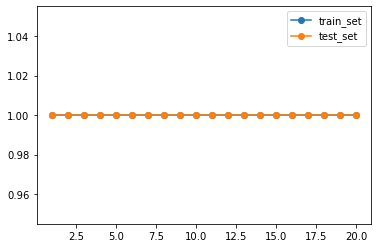

In [16]:
train_scores, test_scores = list(), list()

values = [i for i in range (1, 21)]
for i in values:
    model = SVC()
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

    # plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='train_set')
plt.plot(values, test_scores, '-o', label='test_set')
plt.legend()
plt.show()

## 3. KNN

In [17]:
knn = KNeighborsClassifier()
knnModel = knn.fit(X_train, y_train)
knnPred = knn.predict(X_train)
print(confusion_matrix(y_train, knnPred))
print(classification_report(y_train, knnPred))


knnPred = knn.predict(X_test)
print(confusion_matrix(y_test, knnPred))
print(classification_report(y_test, knnPred))

[[103   0   0   0   0]
 [  0 102   0   0   0]
 [  0   0  98   0   0]
 [  0   0   0 100   0]
 [  0   0   0   0 101]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       102
           2       1.00      1.00      1.00        98
           3       1.00      1.00      1.00       100
           4       1.00      1.00      1.00       101

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504

[[23  0  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00

>1, train: 1.000, test: 1.000
>2, train: 1.000, test: 1.000
>3, train: 1.000, test: 1.000
>4, train: 1.000, test: 1.000
>5, train: 1.000, test: 1.000
>6, train: 1.000, test: 1.000
>7, train: 1.000, test: 1.000
>8, train: 1.000, test: 1.000
>9, train: 1.000, test: 1.000
>10, train: 1.000, test: 1.000
>11, train: 1.000, test: 1.000
>12, train: 1.000, test: 1.000
>13, train: 1.000, test: 1.000
>14, train: 1.000, test: 1.000
>15, train: 1.000, test: 1.000
>16, train: 1.000, test: 1.000
>17, train: 1.000, test: 1.000
>18, train: 1.000, test: 1.000
>19, train: 1.000, test: 1.000
>20, train: 1.000, test: 1.000
>21, train: 1.000, test: 1.000
>22, train: 1.000, test: 1.000
>23, train: 1.000, test: 1.000
>24, train: 1.000, test: 1.000
>25, train: 1.000, test: 1.000
>26, train: 1.000, test: 1.000
>27, train: 1.000, test: 1.000
>28, train: 1.000, test: 1.000
>29, train: 1.000, test: 1.000
>30, train: 1.000, test: 1.000
>31, train: 1.000, test: 1.000
>32, train: 1.000, test: 1.000
>33, train: 1.000

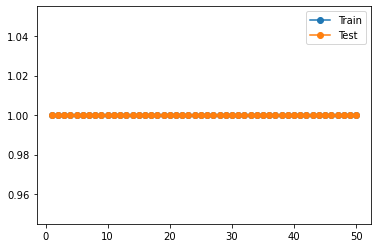

In [18]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 51)]
for i in values:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

## 4. Voting Classifier

In [19]:
estimators =[('svm', svc_model), ('KNN', knn), ('DecisionTree', dt)]

ensemble = VotingClassifier(estimators, voting = 'hard')

ensembleModel = ensemble.fit(X_train, y_train)

ensemblePred = ensemble.predict(X_test)
print(classification_report(y_test, ensemblePred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



>1, train: 1.000, test: 1.000
>2, train: 1.000, test: 1.000
>3, train: 1.000, test: 1.000
>4, train: 1.000, test: 1.000
>5, train: 1.000, test: 1.000
>6, train: 1.000, test: 1.000
>7, train: 1.000, test: 1.000
>8, train: 1.000, test: 1.000
>9, train: 1.000, test: 1.000
>10, train: 1.000, test: 1.000
>11, train: 1.000, test: 1.000
>12, train: 1.000, test: 1.000
>13, train: 1.000, test: 1.000
>14, train: 1.000, test: 1.000
>15, train: 1.000, test: 1.000
>16, train: 1.000, test: 1.000
>17, train: 1.000, test: 1.000
>18, train: 1.000, test: 1.000
>19, train: 1.000, test: 1.000
>20, train: 1.000, test: 1.000
>21, train: 1.000, test: 1.000
>22, train: 1.000, test: 1.000
>23, train: 1.000, test: 1.000
>24, train: 1.000, test: 1.000
>25, train: 1.000, test: 1.000
>26, train: 1.000, test: 1.000
>27, train: 1.000, test: 1.000
>28, train: 1.000, test: 1.000
>29, train: 1.000, test: 1.000
>30, train: 1.000, test: 1.000
>31, train: 1.000, test: 1.000
>32, train: 1.000, test: 1.000
>33, train: 1.000

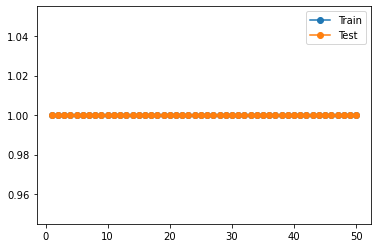

In [20]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 51)]
for i in values:
    model = ensemble
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

## 5. Bagging

In [21]:
start = time.time()
param_dist = {'max_depth' :[2,3,4],
             'bootstrap': [True, False],
             'max_features': ['auto', 'sqrt', 'log2', None],
             'criterion': ['gini', 'entropy']}

fit_rf = RandomForestClassifier()
cv_rf = GridSearchCV(fit_rf, cv = 10, param_grid = param_dist, n_jobs = 3)

rfModel = cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto'}
Time taken in grid search:  27.53


In [22]:
rfPred = cv_rf.predict(X_test)
print(classification_report(y_test, rfPred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.92      0.96        24
           2       1.00      1.00      1.00        28
           3       1.00      0.96      0.98        26
           4       0.96      1.00      0.98        25

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



In [23]:
rfPred = cv_rf.predict(X_train)
print(classification_report(y_train, rfPred))

rfPred = cv_rf.predict(X_test)
print(classification_report(y_test, rfPred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       102
           2       1.00      1.00      1.00        98
           3       1.00      1.00      1.00       100
           4       1.00      1.00      1.00       101

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.92      0.96        24
           2       1.00      1.00      1.00        28
           3       1.00      0.96      0.98        26
           4       0.96      1.00      0.98        25

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



>1, train: 1.000, test: 0.984
>2, train: 1.000, test: 0.984
>3, train: 1.000, test: 0.984
>4, train: 1.000, test: 0.984
>5, train: 1.000, test: 0.976
>6, train: 1.000, test: 0.992
>7, train: 1.000, test: 0.984
>8, train: 1.000, test: 0.984
>9, train: 1.000, test: 0.984
>10, train: 1.000, test: 0.984
>11, train: 1.000, test: 0.984
>12, train: 1.000, test: 0.984
>13, train: 1.000, test: 0.984
>14, train: 1.000, test: 0.976
>15, train: 1.000, test: 0.984
>16, train: 1.000, test: 0.992
>17, train: 1.000, test: 0.984
>18, train: 1.000, test: 0.984
>19, train: 1.000, test: 0.976
>20, train: 1.000, test: 0.976


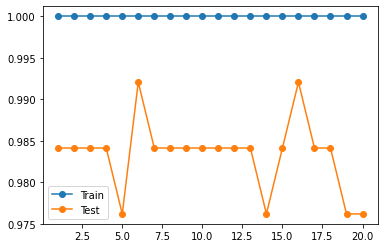

In [24]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]
for i in values:
    model = cv_rf
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

Considering the some models that tested show the possibility of overfit and underfit even though the accuracy shown is high, Decision Tree is chosen as the classifier for the predictive model because it produces high accuracy but doesn't show the condition of underfit and overfit.

### Conclusion

Each variable in the dataset has a high influence on the stress level not only by sleeping hours. The higher those variables, the higher their stress level. In summary, sleeping habits does effect someone's stress level. Another concerning aspects is the dataset used that has the possibility of being artificially generated due to high value that shown in the correlation matrix, the absence of outliers and lacks of null values. However, the model we made and tested has shown high accuracy without any possibility to overfit or underfit. By the high correlation value shown, it is concluded that the model has a high precision.